In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
video_path = '/content/gdrive/MyDrive/V123.mp4'

In [11]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
  print("> Error opening video file.")

frame_count = 0
euclidean_distance = []
frames = []
while True:
  ret0, frame0 = cap.read()
  if not ret0:
    print("> End of video.")
    break
  frame_count += 1

  ret1, frame1 = cap.read()
  if not ret1:
    print("> End of video.")
    break
  frame_count += 1

  distance = np.linalg.norm(frame0 - frame1) / 100000
  euclidean_distance.append(distance)
  if distance > 10:
    frame_pair = (frame0, frame1)
    frames.append(frame_pair)

cap.release()

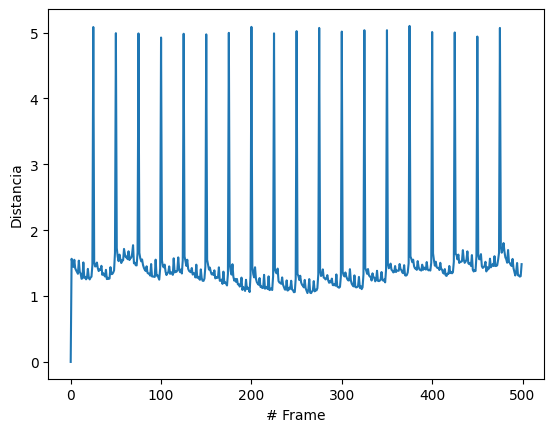

In [12]:
plt.plot(euclidean_distance)
plt.xlabel('# Frame')
plt.ylabel('Distancia')
plt.show()

In [13]:
for idx, f in enumerate(frames):
  stack = np.concatenate(f, axis=1)
  name = "img_{0}.jpg".format(idx)
  cv2.imwrite(name, stack)